# Skript, welches durch die App generiert wurde

- notwendige Module installieren
- Pfad für die Datei anpassen

Accuracy: 0.8529095654844158
Precision: 0.7228637413394919
Recall: 0.6109303838646715
F1 Score: 0.6622002820874471
Equalized Odds Difference: 0.08548320443945923
Demographic Parity Difference: 0.18345449277091488
Demographic Parity Ratio: 0.29465468387902205


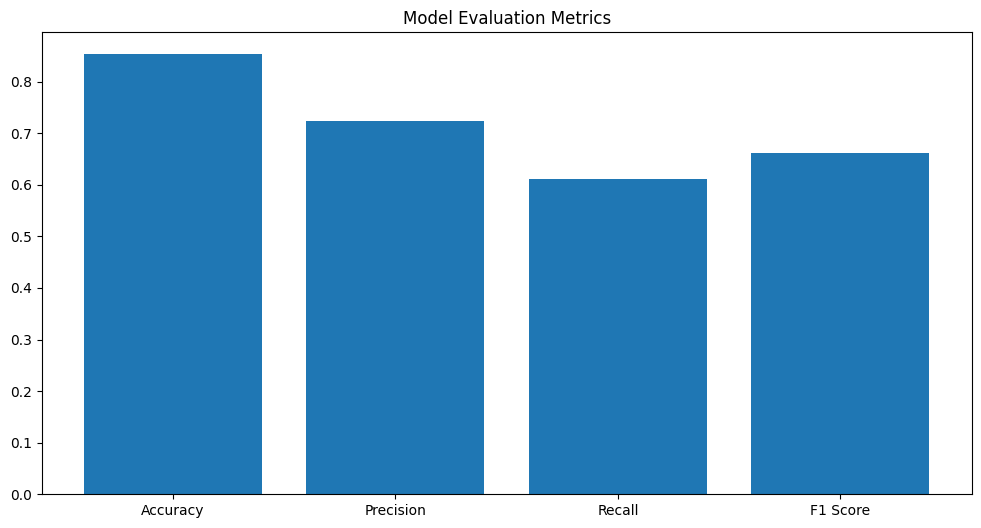

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from fairlearn.metrics import equalized_odds_difference, demographic_parity_difference, demographic_parity_ratio

# Load the dataset
df = pd.read_csv(r"C:\Users\kimko\PortfolioProjekt\adult.csv") 


# Preprocessing
# Handle missing values
df = df.replace('Unknown', np.nan)
df = df.dropna()

# Encode categorical variables
le = LabelEncoder()
categorical_features = df.select_dtypes(include=[object]).columns
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Define the target variable and the feature matrix
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement and train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Fairness analysis
EOD = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test['sex'])
DPD = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test['sex'])
DPO = demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test['sex'])

print(f'Equalized Odds Difference: {EOD}')
print(f'Demographic Parity Difference: {DPD}')
print(f'Demographic Parity Ratio: {DPO}')

# Visualize results
plt.figure(figsize=(12,6))
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1])
plt.title('Model Evaluation Metrics')
plt.show()